In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,GREScore,CGPA,predict
0,337,9.65,0.92
1,324,8.87,0.76
2,316,8.00,0.72
3,322,8.67,0.80
4,314,8.21,0.65


In [4]:
df.shape

(400, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GREScore  400 non-null    int64  
 1   CGPA      400 non-null    float64
 2   predict   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.columns

Index(['GREScore', 'CGPA', 'predict'], dtype='object')

In [8]:
df.describe()

,GREScore,CGPA,predict
count,400.000000,400.000000,400.000000
mean,316.807500,8.598925,0.724350
std,11.473646,0.596317,0.142609
min,290.000000,6.800000,0.340000
25%,308.000000,8.170000,0.640000
50%,317.000000,8.610000,0.730000
75%,325.000000,9.062500,0.830000
max,340.000000,9.920000,0.970000


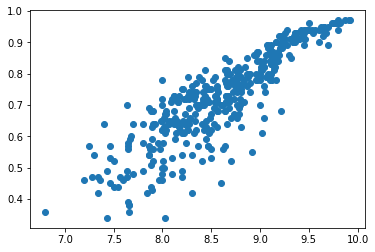

In [9]:
plt.scatter( x= df.CGPA , y = df.predict)

In [10]:
df.isnull().sum()

GREScore    0
CGPA        0
predict     0
dtype: int64

## Split Data

In [11]:
features = ['GREScore','CGPA']
target = ['predict']

In [12]:
#splitting data set into training and test data set in 0.7/0.3
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.30)
print("train data", train.shape)

train data (280, 3)


In [13]:
print("test data",test.shape)

test data (120, 3)


In [14]:
#Fill the training and test data with require information
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

## model Build

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# lr = SVR()
# lr = RandomForestRegressor()
# lr = DecisionTreeRegressor()
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
pd.DataFrame(np.c_[X_test, y_test,y_pred], columns = ["Gre","cgpa","actualpredict","machinepredict"])

,Gre,cgpa,actualpredict,machinepredict
0,301.0,7.88,0.44,0.558781
1,300.0,8.01,0.58,0.575662
2,321.0,8.85,0.82,0.782595
3,337.0,9.65,0.92,0.965419
4,323.0,8.60,0.45,0.750406
...,...,...,...,...
115,313.0,8.68,0.71,0.727352
116,323.0,8.44,0.73,0.725245
117,330.0,9.17,0.86,0.864990
118,317.0,8.15,0.65,0.658258


### evaluate model

In [18]:
print(lr.score(X_test,y_test))

0.7343906601196507


In [19]:
#root mean square

from sklearn.metrics import mean_squared_error
college_predictions = lr.predict(X_train)
mse = mean_squared_error(y_train,college_predictions)
rmse = np.sqrt(mse)

In [20]:
rmse

0.06379811194350299

In [22]:
feature = [336.0,9.80]
result = lr.predict([feature])[0][0]*100
a = result.round(2)
print(f"If your GRE Score is {feature[0]} and CGPA is {feature[1]} Then Your Chance Of college is",a)

If your GRE Score is 336.0 and CGPA is 9.8 Then Your Chance Of college is 98.54
